In [11]:
import librosa
y, sr = librosa.load('../data/raw/AmbisonicSoundLibrary/nature/Anna Bay Cicadas.mp3',sr=None)
sr

44100

In [12]:
y_mono = librosa.to_mono(y)
y_mono

array([0.0000000e+00, 4.7651152e-13, 5.3447784e-13, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [13]:
from soundsig.sound import BioSound
myBioSound = BioSound(soundWave=y_mono, fs=sr)

In [14]:
# Calculate the spectrogram and the rms
myBioSound.spectroCalc(spec_sample_rate=1000, freq_spacing = 50, min_freq=0, max_freq=10000)
myBioSound.rms = myBioSound.sound.std() 

# Calculate amplitude enveloppe
myBioSound.ampenv(cutoff_freq = 20, amp_sample_rate = 1000)

# Calculate the power spectrum
myBioSound.spectrum(f_high=10000)

/Users/andrewchang/opt/anaconda3/envs/Springboard_GoogleAudio/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                Bird b'Unknown'    Call Type b'U'


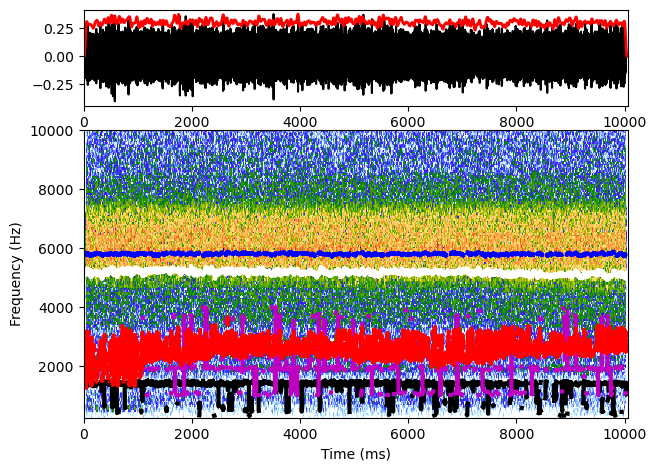

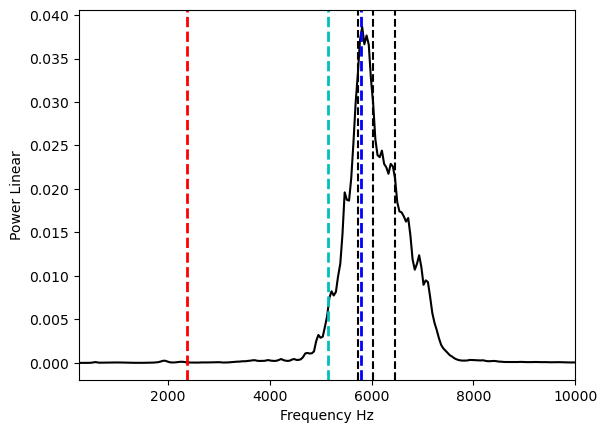

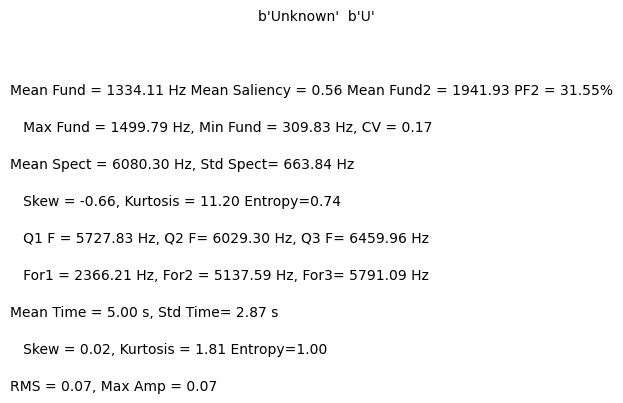

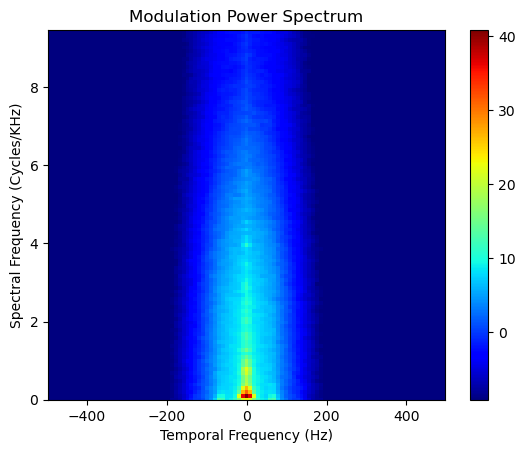

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [16]:
# Calculate fundamental and related values.  These are the default values.
# For the estimation of the fundamental, four methods are available: 
# 'AC' - Peak of the auto-correlation function
# 'ACA' - Peak of envelope of auto-correlation function 
# 'Cep' - First peak in cepstrum 
# 'Stack' - Fitting of harmonic stacks (default - works well for zebra finches)

myBioSound.fundest(maxFund = 1500, minFund = 300, lowFc = 200, highFc = 6000, 
                   minSaliency = 0.5, debugFig = 0, 
                   minFormantFreq = 500, maxFormantBW = 500, windowFormant = 0.1,
                   method='Stack')

# Calculate the MPS
myBioSound.mpsCalc(window=0.1, Norm = True)


print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('                Bird %s    Call Type %s' % (myBioSound.emitter, myBioSound.type))
myBioSound.plot(DBNOISE=50, f_low=250, f_high=10000)  
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
